In [1]:
%run "data_processing.ipynb"

Remaining rows:  6848


# Part 0: Addtional Cleaning and Definitions

In [2]:
import matplotlib.pyplot as plt
import scipy as sp, scipy
from sklearn import linear_model
import seaborn as sns; sns.set(color_codes=True)
from scipy.stats import ttest_ind, ttest_rel
colums = df_atus.columns

FEATURE_COLS = ['HH_SIZE', 'FAMINCOME', 'POVERTY130', 'POVERTY185',
       'POVERTYLEVEL', 'FOODSTAMP', 'WIC', 'HHTENURE', 'HH_CHILD', 'HOUSETYPE',
       'HH_NUMKIDS', 'HH_SIZE_CPS8', 'HH_CHILD_CPS8', 'QFAMINCOME', 'PERNUM',
       'LINENO', 'WT06', 'AGE', 'SEX', 'RACE', 'MARST', 'GENHEALTH', 'HEIGHT',
       'WEIGHT', 'BMI', 'EH_RESP', 'PED', 'SED_EAT', 'FOODSHOP', 'MEALPREP',
       'SODA', 'DIETSODA', 'MILK', 'MEAT', 'STORE', 'STREASON', 'EXERCISE',
       'EXFREQ', 'FASTFD', 'FASTFDFREQ', 'FDTHERM', 'ENOUGHFD', 'ANYSECDRK',
       'ANYSECEAT']
CONTINUOUS_FEATURES = ['HH_SIZE', 'HH_CHILD',
                        'AGE',
                      'PED', 'SED_EAT', 'EXFREQ', 'FASTFDFREQ']
# cannot include weight and height because these are directly associated with
# BMI
EXCLUDED_CONTINUOUS_FEATURES = ['HEIGHT', 'WEIGHT']
CATEGORICAL_FEATURES = ['FAMINCOME', 'POVERTY130', 'POVERTY185',
                       'POVERTYLEVEL', 'FOODSTAMP', 'WIC',
                       'HHTENURE', 'HOUSETYPE', 'QFAMINCOME',
                       'GENHEALTH', 'SEX', 'RACE', 'MARST',
                       'EH_RESP', 'FOODSHOP', 'MEALPREP',
                       'SODA', 'DIETSODA', 'MILK', 'MEAT', 'STORE', 'STREASON', 'EXERCISE',
                       'FASTFD', 'FDTHERM', 'ENOUGHFD', 'ANYSECDRK',
                       'ANYSECEAT']

# Sanity checking remaining data counts.

In [3]:
#This block of code checks for features less than 99. 99 is the code for unreported. low means are categoricals.
dont_work = ['RACE', 'POVERTY130', 'POVERTY185','SEX']

print ("Checking max range of variable, sample counts, and mean.")
print()

for x in CATEGORICAL_FEATURES:
        if x not in dont_work:
            q = (df_atus[x] < 90)
            if (len(x)<=6):
                x2= x + "     "
            else:
                x2 = x
            print(x2,"\t",   max(df_atus[q][x]),np.sum(q), int(np.mean(df_atus[q][x])))

for x in CONTINUOUS_FEATURES:
        if x not in dont_work:
            q = (df_atus[x] < 90) 
            if (len(x)<=6):
                x2= x + "     "
            else:
                x2 = x       
            print(x2,  "\t",max(df_atus[q][x]),np.sum([(df_atus[x] < 90)]), int(np.mean(df_atus[q][x])))

Checking max range of variable, sample counts, and mean.

FAMINCOME 	 16 6848 11
POVERTYLEVEL 	 7.0 6848 5
FOODSTAMP 	 2.0 6825 1
WIC      	 2.0 3519 1
HHTENURE 	 3 6848 1
HOUSETYPE 	 12 6848 1
QFAMINCOME 	 43 6848 4
GENHEALTH 	 5 6813 2
MARST      	 6 6848 3
EH_RESP 	 1.0 6848 1
FOODSHOP 	 3.0 6847 1
MEALPREP 	 3.0 6846 1
SODA      	 2.0 4558 1
DIETSODA 	 3.0 1646 1
MILK      	 2.0 4963 1
MEAT      	 2.0 4964 1
STORE      	 5.0 5029 1
STREASON 	 6.0 4965 2
EXERCISE 	 2.0 6845 1
FASTFD      	 2.0 6834 1
FDTHERM 	 2.0 4364 1
ENOUGHFD 	 3.0 6837 1
ANYSECDRK 	 2.0 6842 1
ANYSECEAT 	 2.0 6813 1
HH_SIZE 	 10 6848 2
HH_CHILD 	 1 6848 0
AGE      	 85 6848 49
PED      	 89.0 4881 41
SED_EAT 	 85.0 6549 10
EXFREQ      	 50.0 4391 4
FASTFDFREQ 	 21.0 3916 2


# Legend for BMI categories and feature codes

## BMI categories
FROM CDC

Below 18.5	Underweight

18.5 – 24.9	Normal or Healthy Weight

25.0 – 29.9	Overweight

30.0 and Above	Obese

## Feature codes
96 = refuse, 97 = dont know 99 = not in universe.	
Note : We drop reported value over 90.


[GENHEALTH]	
01	Excellent	
02	Very good	
03	Good	
04	Fair	
05	Poor	

[PED]	
Total time in primary eating and drinking (in minutes) 		
PED is a 4-digit numeric variable reported in minutes. 	

[SED_DRINK]	
Total time in secondary drinking (in minutes)
SED_DRINK is a 5-digit numeric variable reported in minutes.	

[FOODSHOP]	
ATUS respondent usually does the food shopping, is the food shoper.		
123 	
yes,no,split between spouse, [1,2,3]	

[MEALPREP]	
ATUS Respondent usually does the meal preparation?	
123	
yes,no,both partner	

[SODA]	
Consumed soda in the last 7 days?	
12	
yes,no	

[DIETSODA]
consumed diet soda?	
123	
yes,no,both regular and diet	

[MILK]	
Drank Unpasteurized or raw milk in last 7 days?	
12	
yes,no	

[MEAT]	
Prepared any meals with meat, poultry or seafood in last 7 days?	
12
yes,no

[STORE]	
Place where majority of groceries purchased by respondent.	
1 grocery store	
2 super center	
3 warehouse club	
4 drugstore	
5 other	

[STREASON]	
Reasons to buy foodat prefered store? 	
1 price	
2 location	
3 quality	
4 variety 	
5 customer service 	
6 other	

[EXERCISE]	
Does the respondent exercise weekly?	
12
yes,no

[PRPMEL]	
Are you the person who usually prepares the meals in your household?	
12	
yes,no

'FASTFDFREQ' Times purchased prepared food in last 7 days

'EXFREQ' 	Times participated in physical activities in last 7 days

'PED'	Total time in primary eating and drinking (in minutes)	

'SED_EAT'	Total time in secondary eating (in minutes)





# Functions which runs tests and graphs for distributions

In [4]:
OB_RANGE = [30,99,"OBESE"] 
OW_RANGE = [25,30,"OVER"]
NW_RANGE = [18.5,25,"NORMAL"]
UW_RANGE = [12,18.5,"UNDER"]

BMI_RANGES = [OB_RANGE,OW_RANGE,NW_RANGE,UW_RANGE]
BACKGROUND_BMI_RATES_ALL = []

for bmi in BMI_RANGES:
    df_temp = df_atus
    temp_sum = df_temp[ (df_temp['BMI']>=bmi[0]) & (df_temp['BMI']<bmi[1])]
    temp_sum = len(temp_sum)
    temp_percent = temp_sum/len(df_atus)
    info = [bmi[2],temp_sum,temp_percent]
    info = temp_percent
    BACKGROUND_BMI_RATES_ALL.append(info)
    

def calc_background(df):
    
    out = []
    for bmi in BMI_RANGES:
        df_temp = df
        temp_sum = df_temp[ (df_temp['BMI']>=bmi[0]) & (df_temp['BMI']<bmi[1])]
        temp_sum = len(temp_sum)
        temp_percent = temp_sum/len(df)
        info = [bmi[2],temp_sum,temp_percent]
        info = temp_percent
        out.append(info)
        
    return out
    
    
#this function reports % of response of categorical variables.
def show_results( feature_list, df_input, ignore_above ):
    
    name_stats = {} 
    name_rows = {}
    
    for x in feature_list:
        
        if (x in SKIP_LIST):
            continue;
    
        else:
            t_name  = str(x)
        
            #These are counts
            t_on    = np.sum([(df_input[x] == 1)])
            t_off   = np.sum([(df_input[x] == 2)])
            t_both  = np.sum([(df_input[x] == 3)]) #or split
            t_4     = np.sum([(df_input[x] == 4)])
            t_5     = np.sum([(df_input[x] == 5)])
            t_6     = np.sum([(df_input[x] == 6)])
                             
            t_valid = np.sum([(df_input[x] < ignore_above)])
            t_total = np.sum(df_input[x])
            
            #These are the actual df_rows
            r_on    = df_input.loc[df_input[x] == 1]
            r_off   = df_input.loc[df_input[x] == 2]
            r_both  = df_input.loc[df_input[x] == 3]
            r_4     = df_input.loc[df_input[x] == 4]
            r_5     = df_input.loc[df_input[x] == 5]
            r_6     = df_input.loc[df_input[x] == 6]
            
            r_valid = df_input.loc[df_input[x] < ignore_above]
            
            t_zero  = np.sum([(df_input[x] == 0)])
            tab = "\t"
            
            if t_zero > 1:
                print ("warning, there is zeros")
                raise NameError('ZEROS')
            
            print("Feature Name        : ",t_name)
            print("# of ONs            : ",t_on,tab,t_on/t_valid*100)
            print("# of OFFs           : ",t_off,tab,t_off/t_valid*100)
            if (np.sum([(df_atus[x] == 3)]) > 0):
                print("# of BOTHs/SPLITs   : ",t_both,tab,t_both/t_valid*100)
            print("# of KNOWN RESPONSE : ", t_valid,tab,t_valid/t_total*100)
            #print("# of TOTAL RESPONSE : ", int(t_total))
            print("-----------------------")
            #print("")
            
            name_stats[t_name] = [0,t_on,t_off,t_both,t_4,t_5,t_6,t_valid,t_total]
            name_rows[t_name] = [0,r_on,r_off,r_both,r_4,r_5,r_6,r_valid] 
            
    return name_stats, name_rows
        

                            
#Takes results from last function, which is an array containing 2 dictionaries, one for counts, one for the actual rows.
#THIS IS P(BMI_CLASS|BEHAVIOR)
def feat_to_bmi(in_data,max_state,graph_mode):
    
    counts = in_data[0] #counts is a dictionary, whose keys are features, whos values are # of instances).
    rows = in_data[1]   #rows is a dictionary, whose keys are features, whos values are array of DFs (who are on and offs).
    
    #print(type_counts)
    #print(type(rows)) 
    
    out_record = []
    for df_feat in rows: #FOR ALL FEATURES, reported in the dictionary.
        
        for x in range(1,max_state+1):# FOR ALL BINARY(3) STATES
            
            df_temp = rows[df_feat][x]
            df_temp1 = rows[df_feat][x]
            df_temp2 = df_atus[~df_atus.isin(df_temp1).all(1)] #compare against compliment, not whole populat
            BACKGROUND_BMI_RATES = calc_background(df_temp2)
            
            
            if (graph_mode==1):
                #HELP ME LABEL THESE GRAPH
                

            

                out = ttest_ind(df_temp1.BMI, df_temp2.BMI)
                
                record = [out[1],out[0],df_feat,x]
                
                out_record.append(record)
                
                #ttest_real doese not assume same variance,
                #but random sampling is problematic due to size difference.
                #out = ttest_rel(df_temp1.BMI, df_temp2.sample(len(df_temp1)).BMI)
                #print(" T-statistic: " + str(out[0]),"p-value: "+str(out[1]))
                
                
                sns.distplot(df_temp1.BMI, label = str(df_feat))
                sns.distplot(df_temp2.BMI, label = "Population", color = 'y')
                
                if (max_state<=3):
                    word = ""
                    if x == 1:
                        word = "YES"
                    if x == 2:
                        word = "NO"
                    if x ==3:
                        word = "BOTH"
                else:
                    word = str(x)

                plt.title('FEATURE : ' + df_feat + " | STATUS: " + word)
                print("----------------------------------------------------------------------------------")
                plt.show()
                print("T-statistic: " + str(out[0]),"p-value: "+str(out[1]))
                print("----------------------------------------------------------------------------------")
                print()
                
            else:
                print("----------------------------------------------------------------------------------")
                temp_c  = counts[df_feat][x]
                temp_plot_values = [] #the % to show in the plots

                if (x==3 and len(df_temp)==0): #skip for only binaries
                    break

                #print(len(df_temp))
                #print(type(df_temp))

                temp_check = []
                temp_check2 = []

                print ("TOTAL CASES: ","","","",str(temp_c))
                for bmi in range(len(BMI_RANGES)): #FOR ALL WEIGHT CATEGORIES


                    temp_sum = df_temp[ (df_temp['BMI']>=BMI_RANGES[bmi][0]) & (df_temp['BMI']<BMI_RANGES[bmi][1])]
                    temp_sum = len(temp_sum)
                    temp_percent = temp_sum / temp_c

                    temp_check.append(temp_sum)
                    temp_check2.append(temp_percent)

                    offset = (temp_percent-BACKGROUND_BMI_RATES[bmi])*100


                    print(df_feat,x,BMI_RANGES[bmi][2],"\t",temp_sum,"\t",temp_percent*100,"%", "   OFF :"+str(offset)) 



                    temp_plot_values.append(temp_percent)



                print("")    
                #print("check if cases # matche:","",sum(temp_check) == temp_c)
                #print("check if % adds to one :","",1-sum(temp_check2) <= 0.01)

                n_groups = 4

                # create plot
                fig, ax = plt.subplots()
                index = np.arange(n_groups)
                bar_width = 0.35

                opacity = 0.8
                
                #print(sum(BACKGROUND_BMI_RATES))
                #print(sum(temp_plot_values))
                rects1 = plt.bar(index, BACKGROUND_BMI_RATES , bar_width,
                                 alpha=opacity,
                                 color='y',
                                 label='Population %')

                rects2 = plt.bar(index + bar_width, temp_plot_values, bar_width,
                                 alpha=opacity,
                                 color='g',
                                 label='Feature %')

                plt.xlabel('BMI CLASS')
                plt.ylabel('%')
                if (max_state<=3):
                    word = ""
                    if x == 1:
                        word = "YES"
                    if x == 2:
                        word = "NO"
                    if x ==3:
                        word = "BOTH"
                else:
                    word = str(x)

                plt.title('FEATURE : ' + df_feat + " | STATUS: " + word)
                plt.xticks(index + bar_width, ('OBESE', 'OVERWEIGHT', 'NORMAL', 'UNDERWEIGHT'))
                plt.legend()
                plt.ylim([0,0.55])

                plt.tight_layout()
                plt.show()

                print("----------------------------------------------------------------------------------")
   
    return out_record



#BMI FOODSHOP STORES

# Part 1: Analysis of discrete/categorical variables

In [5]:
ON_OFF_FEATURES = ['ALLDAYEAT','SODA','MILK','MEAT','EXERCISE','PRPMEL'] 
THREE_OPTIONS = ['FOODSHOP','MEALPREP','DIETSODA']
FIVE_OPTIONS = ['GENHEALTH', 'STORE' ]
SIX_OPTIONS = ['STREASON']
SKIP_LIST = ['ALLDAYEAT','PRPMEL'] #can run if we re-extract the data, currently missing;

print("Composition of features: \n")

RESULTS_ON_OFF = show_results(ON_OFF_FEATURES,df_atus,90)
RESULTS_THREE = show_results(THREE_OPTIONS,df_atus,90)
RESULTS_FIVE     = show_results(FIVE_OPTIONS,df_atus,90)
RESULTS_SIX      = show_results(SIX_OPTIONS,df_atus,90)
print("Discount GENHEALTH, STORE, STREASON")                             

Composition of features: 

Feature Name        :  SODA
# of ONs            :  1652 	 36.243966652
# of OFFs           :  2906 	 63.756033348
# of KNOWN RESPONSE :  4558 	 1.94649903486
-----------------------
Feature Name        :  MILK
# of ONs            :  82 	 1.65222647592
# of OFFs           :  4881 	 98.3477735241
# of KNOWN RESPONSE :  4963 	 2.52643260386
-----------------------
Feature Name        :  MEAT
# of ONs            :  4365 	 87.9331184529
# of OFFs           :  599 	 12.0668815471
# of KNOWN RESPONSE :  4964 	 2.58454169161
-----------------------
Feature Name        :  EXERCISE
# of ONs            :  4401 	 64.2951059167
# of OFFs           :  2444 	 35.7048940833
# of KNOWN RESPONSE :  6845 	 71.4509394572
-----------------------
Feature Name        :  FOODSHOP
# of ONs            :  4275 	 62.436103403
# of OFFs           :  1772 	 25.8799474222
# of BOTHs/SPLITs   :  800 	 11.6839491748
# of KNOWN RESPONSE :  6847 	 66.3726250485
-----------------------
Feature 

In [6]:
print("These are the overall population BMI Distributions:")
print("")
k = ['Obese','Overweight','Normal','Underweight']
for x in range(len(k)):
    print (k[x]+": "+ str(BACKGROUND_BMI_RATES_ALL[x]*100)+"%")

print()





These are the overall population BMI Distributions:

Obese: 28.417056074766357%
Overweight: 35.5286214953271%
Normal: 34.43341121495327%
Underweight: 1.620911214953271%



Bar charts showing difference of BMI class distribution between feature-specifc and general population

Note: 	General popluation is taken to be the whole population - the features. 
	This prevents double counting and accentuates the effect of the feature.

----------------------------------------------------------------------------------
TOTAL CASES:     1652
SODA 1 OBESE 	 567 	 34.3220338983 %    OFF :7.78238801686
SODA 1 OVER 	 583 	 35.2905569007 %    OFF :-0.313754107742
SODA 1 NORMAL 	 477 	 28.8740920097 %    OFF :-7.32683177784
SODA 1 UNDER 	 25 	 1.51331719128 %    OFF :-0.141802131273



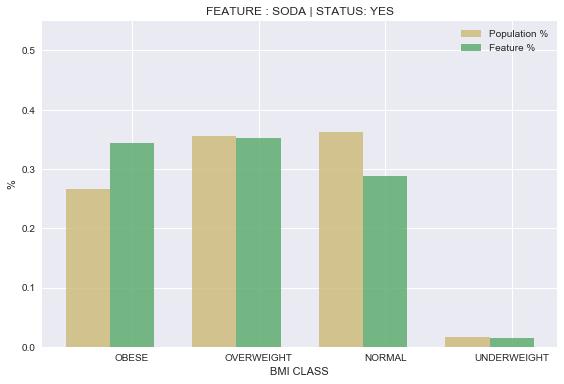

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     2906
SODA 2 OBESE 	 747 	 25.7054370268 %    OFF :-4.71059544399
SODA 2 OVER 	 997 	 34.3083275981 %    OFF :-2.11988143288
SODA 2 NORMAL 	 1116 	 38.40330351 %    OFF :6.89645419491
SODA 2 UNDER 	 46 	 1.58293186511 %    OFF :-0.0659773180491



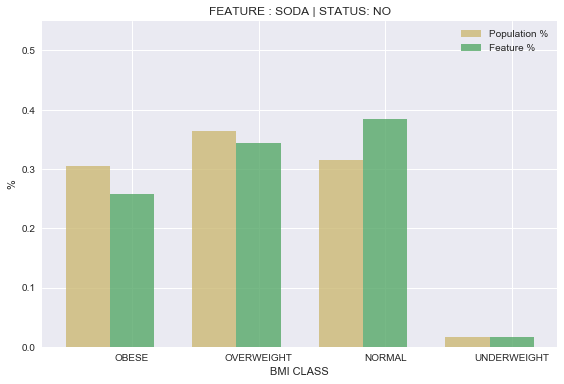

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     82
MILK 1 OBESE 	 28 	 34.1463414634 %    OFF :5.7987210082
MILK 1 OVER 	 31 	 37.8048780488 %    OFF :2.30384346409
MILK 1 NORMAL 	 19 	 23.1707317073 %    OFF :-11.399176658
MILK 1 UNDER 	 4 	 4.87804878049 %    OFF :3.29661218575



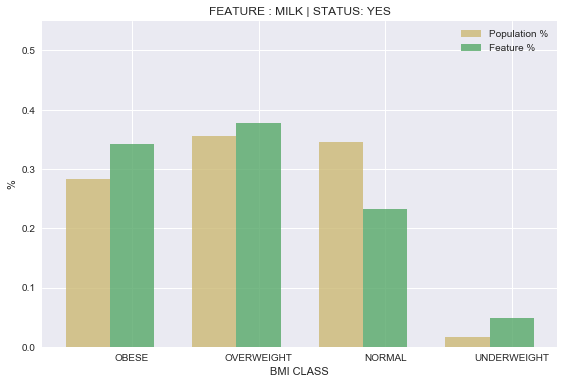

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     4881
MILK 2 OBESE 	 1406 	 28.8055726286 %    OFF :1.35259855637
MILK 2 OVER 	 1704 	 34.9108789183 %    OFF :-2.1506360792
MILK 2 NORMAL 	 1700 	 34.8289284983 %    OFF :1.37697120288
MILK 2 UNDER 	 71 	 1.45461995493 %    OFF :-0.57893368005



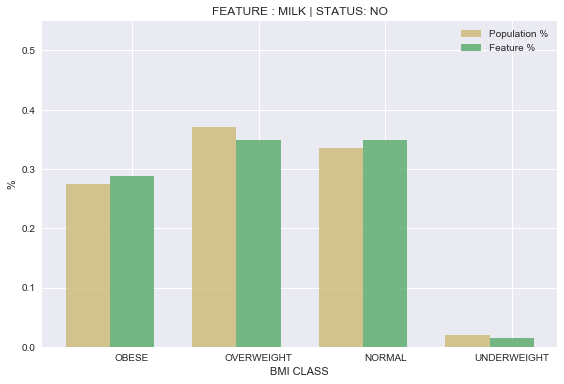

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     4365
MEAT 1 OBESE 	 1267 	 29.0263459336 %    OFF :1.68039345672
MEAT 1 OVER 	 1543 	 35.3493699885 %    OFF :-0.494367425873
MEAT 1 NORMAL 	 1492 	 34.1809851088 %    OFF :-0.696179611276
MEAT 1 UNDER 	 63 	 1.44329896907 %    OFF :-0.489846419571



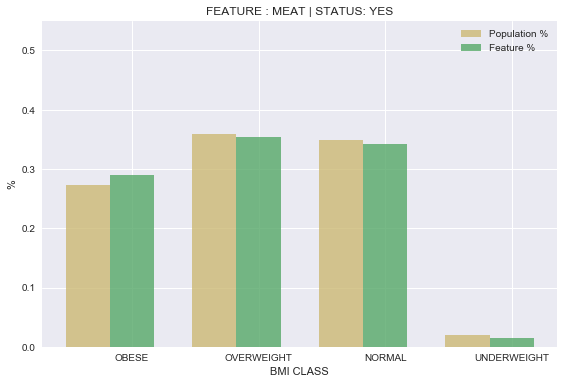

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     599
MEAT 2 OBESE 	 167 	 27.8797996661 %    OFF :-0.588755302685
MEAT 2 OVER 	 189 	 31.5525876461 %    OFF :-4.35715791321
MEAT 2 NORMAL 	 231 	 38.5642737896 %    OFF :4.52682779829
MEAT 2 UNDER 	 12 	 2.00333889816 %    OFF :0.419085417607



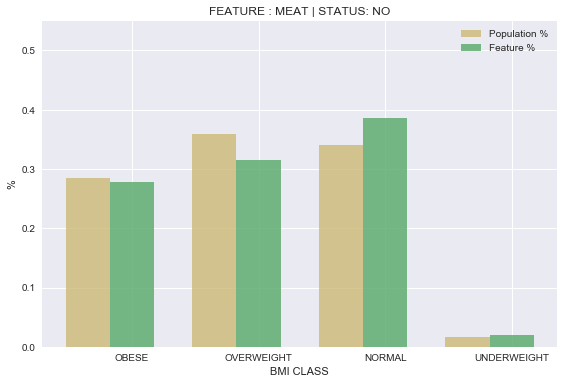

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     4401
EXERCISE 1 OBESE 	 1092 	 24.812542604 %    OFF :-10.0873347969
EXERCISE 1 OVER 	 1596 	 36.2644853442 %    OFF :2.059336182
EXERCISE 1 NORMAL 	 1647 	 37.4233128834 %    OFF :8.36732596067
EXERCISE 1 UNDER 	 66 	 1.49965916837 %    OFF :-0.339327345728



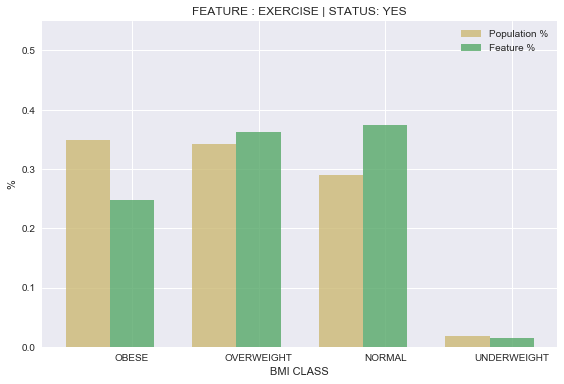

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     2444
EXERCISE 2 OBESE 	 854 	 34.9427168576 %    OFF :10.1470765306
EXERCISE 2 OVER 	 836 	 34.2062193126 %    OFF :-2.05626933408
EXERCISE 2 NORMAL 	 709 	 29.0098199673 %    OFF :-8.43341345689
EXERCISE 2 UNDER 	 45 	 1.84124386252 %    OFF :0.342606260341



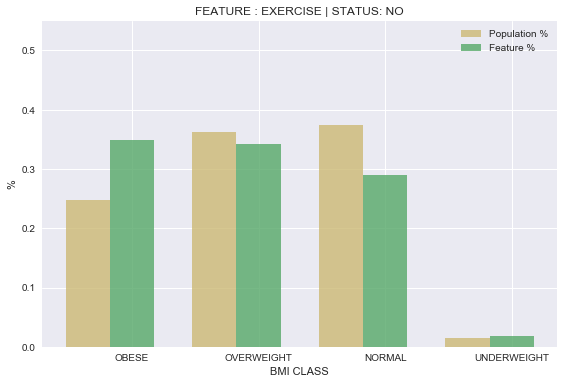

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     4275
FOODSHOP 1 OBESE 	 1221 	 28.5614035088 %    OFF :0.384178479623
FOODSHOP 1 OVER 	 1505 	 35.2046783626 %    OFF :-0.862169674737
FOODSHOP 1 NORMAL 	 1488 	 34.8070175439 %    OFF :0.994347508881
FOODSHOP 1 UNDER 	 61 	 1.4269005848 %    OFF :-0.516356313767



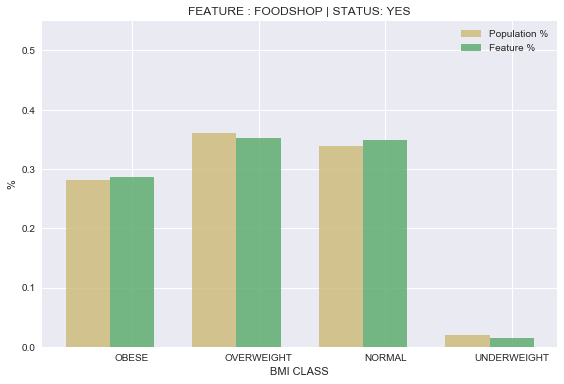

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     1772
FOODSHOP 2 OBESE 	 486 	 27.4266365688 %    OFF :-1.3361687897
FOODSHOP 2 OVER 	 649 	 36.625282167 %    OFF :1.47949808509
FOODSHOP 2 NORMAL 	 596 	 33.6343115124 %    OFF :-1.078060434
FOODSHOP 2 UNDER 	 41 	 2.31376975169 %    OFF :0.934731138612



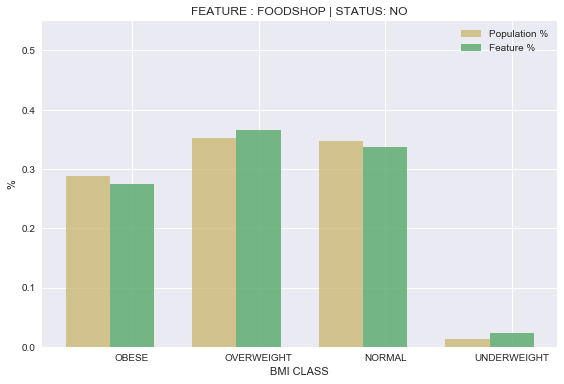

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     800
FOODSHOP 3 OBESE 	 239 	 29.875 %    OFF :1.65079365079
FOODSHOP 3 OVER 	 279 	 34.875 %    OFF :-0.740079365079
FOODSHOP 3 NORMAL 	 273 	 34.125 %    OFF :-0.349206349206
FOODSHOP 3 UNDER 	 9 	 1.125 %    OFF :-0.561507936508



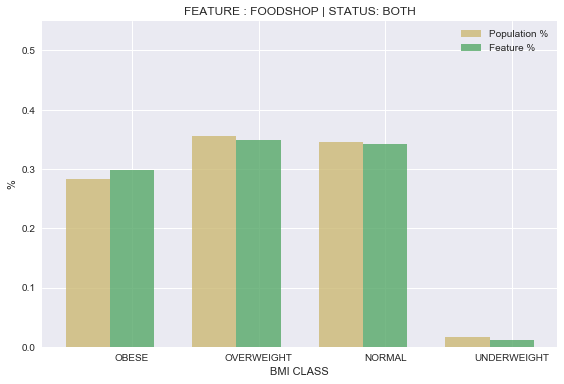

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     4290
MEALPREP 1 OBESE 	 1243 	 28.9743589744 %    OFF :1.49195084301
MEALPREP 1 OVER 	 1507 	 35.1282051282 %    OFF :-1.07195124396
MEALPREP 1 NORMAL 	 1476 	 34.4055944056 %    OFF :-0.0744681432719
MEALPREP 1 UNDER 	 64 	 1.49184149184 %    OFF :-0.345531455774



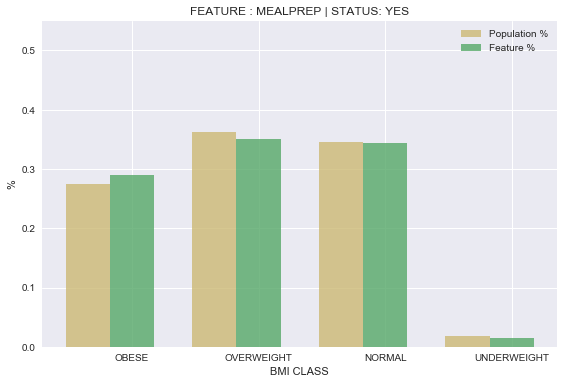

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     1875
MEALPREP 2 OBESE 	 510 	 27.2 %    OFF :-1.67593002212
MEALPREP 2 OVER 	 696 	 37.12 %    OFF :2.1913854816
MEALPREP 2 NORMAL 	 633 	 33.76 %    OFF :-0.927311482003
MEALPREP 2 UNDER 	 36 	 1.92 %    OFF :0.411856022522



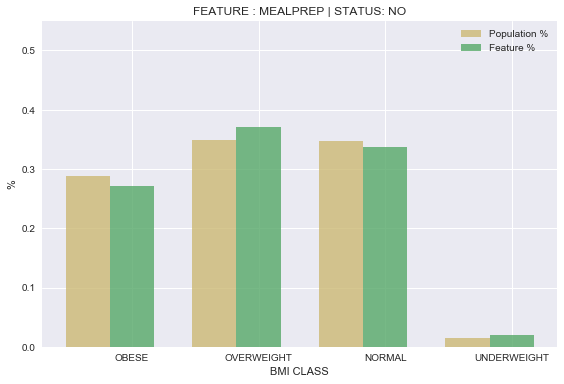

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     681
MEALPREP 3 OBESE 	 193 	 28.3406754772 %    OFF :-0.0848150367869
MEALPREP 3 OVER 	 229 	 33.6270190896 %    OFF :-2.11158963428
MEALPREP 3 NORMAL 	 248 	 36.4170337739 %    OFF :2.20266698288
MEALPREP 3 UNDER 	 11 	 1.61527165932 %    OFF :-0.00626231181217



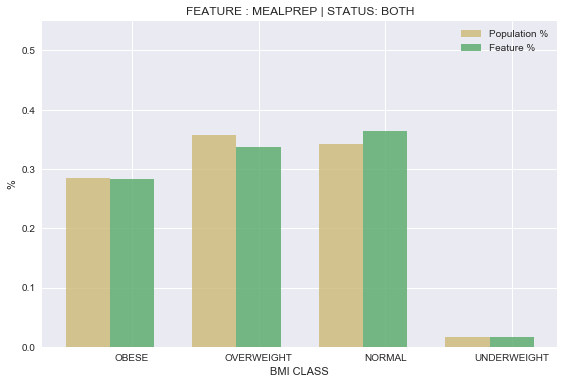

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     634
DIETSODA 1 OBESE 	 231 	 36.4353312303 %    OFF :8.83636116269
DIETSODA 1 OVER 	 235 	 37.0662460568 %    OFF :1.6945048273
DIETSODA 1 NORMAL 	 161 	 25.3943217666 %    OFF :-9.961326769
DIETSODA 1 UNDER 	 7 	 1.10410094637 %    OFF :-0.569539220992



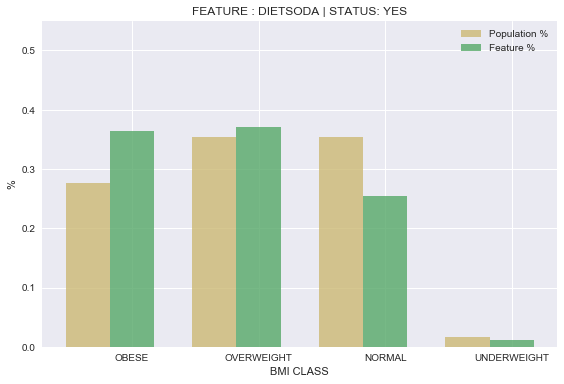

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     961
DIETSODA 2 OBESE 	 308 	 32.0499479709 %    OFF :4.22592894589
DIETSODA 2 OVER 	 334 	 34.7554630593 %    OFF :-0.899369622868
DIETSODA 2 NORMAL 	 301 	 31.3215400624 %    OFF :-3.61985623449
DIETSODA 2 UNDER 	 18 	 1.87304890739 %    OFF :0.293296911465



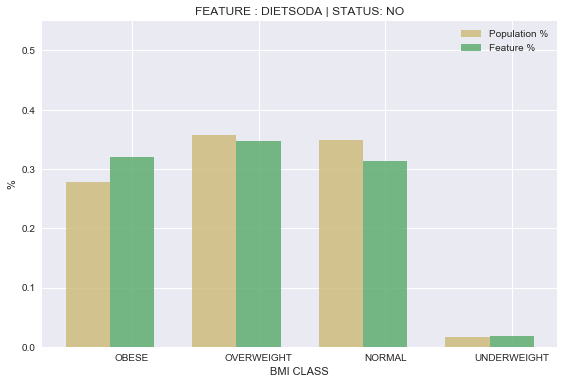

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     51
DIETSODA 3 OBESE 	 27 	 52.9411764706 %    OFF :24.7081324806
DIETSODA 3 OVER 	 12 	 23.5294117647 %    OFF :-12.0892435244
DIETSODA 3 NORMAL 	 12 	 23.5294117647 %    OFF :-10.9858155415
DIETSODA 3 UNDER 	 0 	 0.0 %    OFF :-1.63307341474



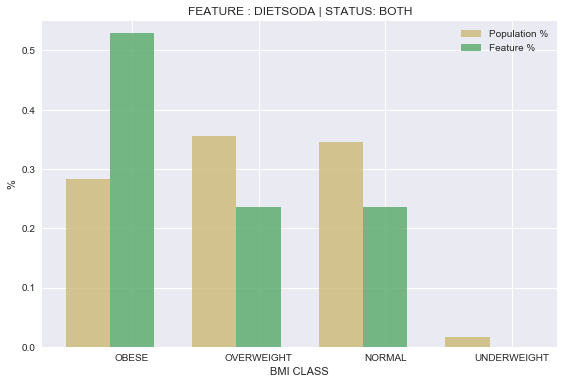

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     1275
GENHEALTH 1 OBESE 	 119 	 9.33333333333 %    OFF :-23.4497278545
GENHEALTH 1 OVER 	 432 	 33.8823529412 %    OFF :-2.0229045503
GENHEALTH 1 NORMAL 	 698 	 54.7450980392 %    OFF :24.9586275565
GENHEALTH 1 UNDER 	 26 	 2.03921568627 %    OFF :0.514004848306



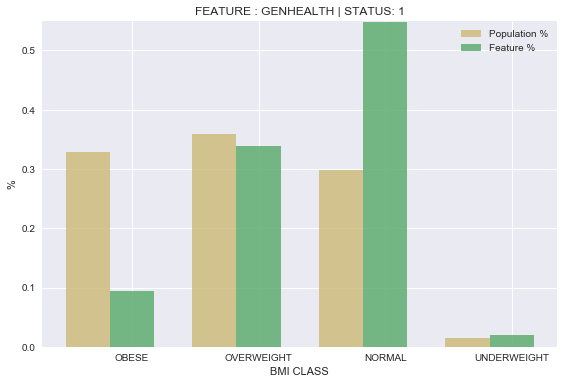

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     2361
GENHEALTH 2 OBESE 	 483 	 20.457433291 %    OFF :-12.1478709212
GENHEALTH 2 OVER 	 959 	 40.6183820415 %    OFF :7.76792516609
GENHEALTH 2 NORMAL 	 882 	 37.3570520966 %    OFF :4.46202200965
GENHEALTH 2 UNDER 	 37 	 1.56713257094 %    OFF :-0.0820762545514



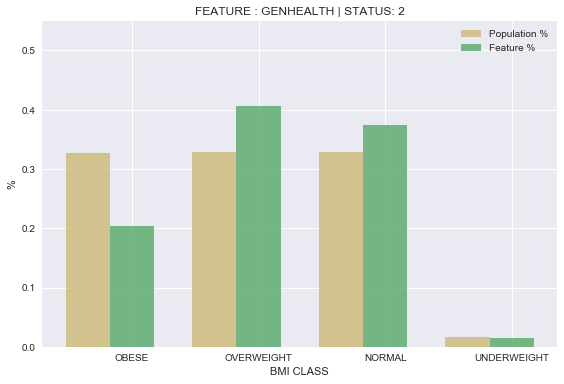

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     2084
GENHEALTH 3 OBESE 	 802 	 38.4836852207 %    OFF :14.4702511317
GENHEALTH 3 OVER 	 710 	 34.0690978887 %    OFF :-2.09798859327
GENHEALTH 3 NORMAL 	 540 	 25.9117082534 %    OFF :-12.2495008147
GENHEALTH 3 UNDER 	 32 	 1.53550863724 %    OFF :-0.122761723805



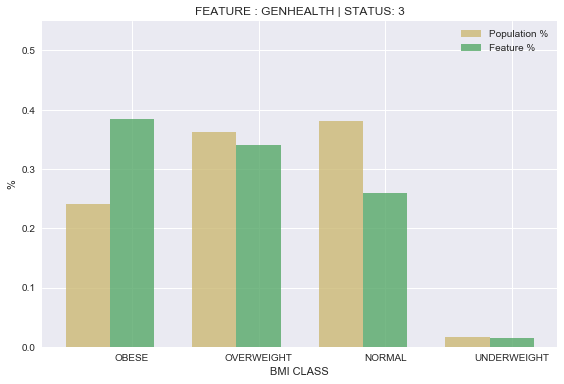

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     811
GENHEALTH 4 OBESE 	 382 	 47.1023427867 %    OFF :21.1954353823
GENHEALTH 4 OVER 	 245 	 30.2096177559 %    OFF :-6.03354938014
GENHEALTH 4 NORMAL 	 174 	 21.4549938348 %    OFF :-14.721915226
GENHEALTH 4 UNDER 	 10 	 1.23304562269 %    OFF :-0.439970776186



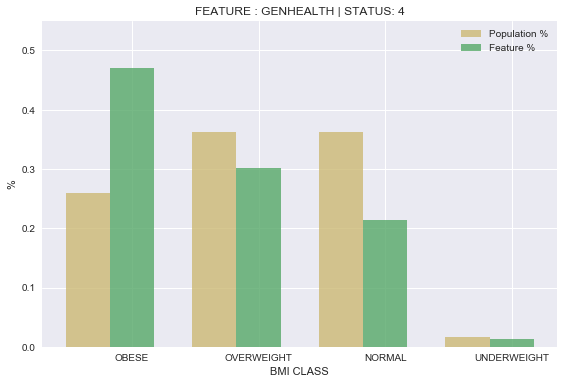

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     282
GENHEALTH 5 OBESE 	 149 	 52.8368794326 %    OFF :25.4686186955
GENHEALTH 5 OVER 	 70 	 24.8226950355 %    OFF :-11.1657301854
GENHEALTH 5 NORMAL 	 57 	 20.2127659574 %    OFF :-14.8314009631
GENHEALTH 5 UNDER 	 6 	 2.12765957447 %    OFF :0.528512452933



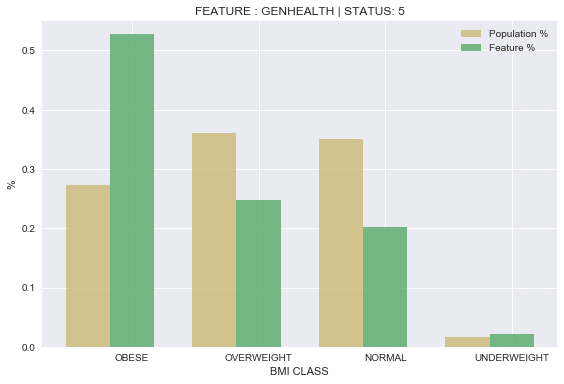

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     3479
STORE 1 OBESE 	 990 	 28.4564530037 %    OFF :0.0800801928136
STORE 1 OVER 	 1194 	 34.320206956 %    OFF :-2.45628458449
STORE 1 NORMAL 	 1243 	 35.7286576602 %    OFF :2.63278351362
STORE 1 UNDER 	 52 	 1.49468237999 %    OFF :-0.256579121935



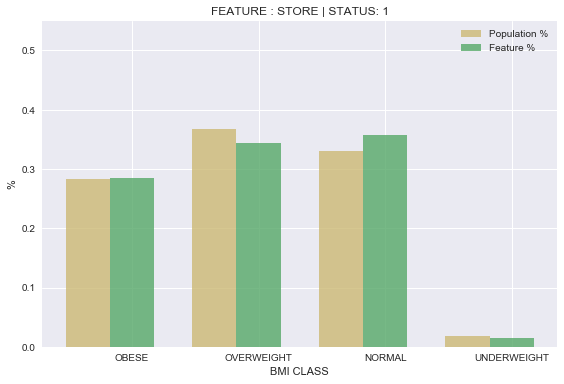

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     1106
STORE 2 OBESE 	 336 	 30.3797468354 %    OFF :2.34073603781
STORE 2 OVER 	 411 	 37.1609403255 %    OFF :1.94672924922
STORE 2 NORMAL 	 351 	 31.7359855335 %    OFF :-3.21699252297
STORE 2 UNDER 	 8 	 0.723327305606 %    OFF :-1.07047276406



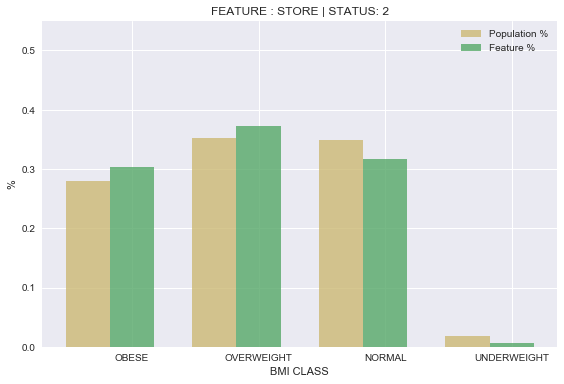

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     270
STORE 3 OBESE 	 69 	 25.5555555556 %    OFF :-2.97895341374
STORE 3 OVER 	 107 	 39.6296296296 %    OFF :4.2693377476
STORE 3 NORMAL 	 89 	 32.962962963 %    OFF :-1.5308041395
STORE 3 UNDER 	 5 	 1.85185185185 %    OFF :0.240419805637



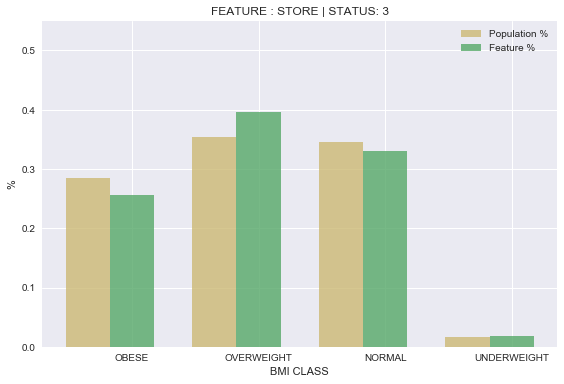

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     25
STORE 4 OBESE 	 11 	 44.0 %    OFF :15.6400410377
STORE 4 OVER 	 3 	 12.0 %    OFF :-23.6148321853
STORE 4 NORMAL 	 11 	 44.0 %    OFF :9.60164150667
STORE 4 UNDER 	 0 	 0.0 %    OFF :-1.62685035908



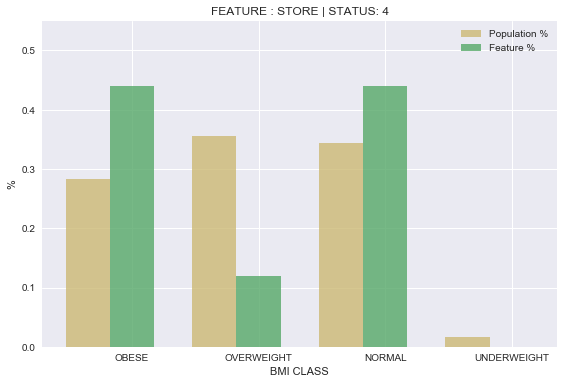

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     149
STORE 5 OBESE 	 39 	 26.1744966443 %    OFF :-2.29243871919
STORE 5 OVER 	 51 	 34.2281879195 %    OFF :-1.32935798291
STORE 5 NORMAL 	 55 	 36.9127516779 %    OFF :2.5344862651
STORE 5 UNDER 	 4 	 2.68456375839 %    OFF :1.087310437



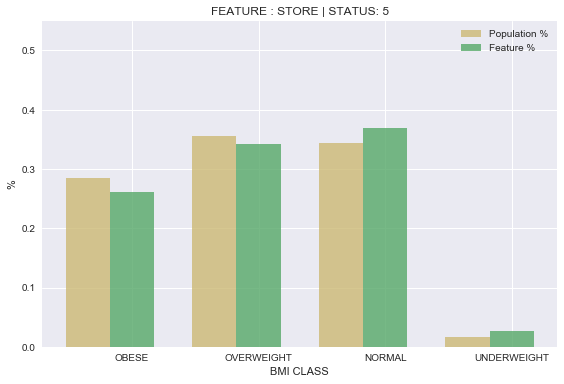

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     1589
STREASON 1 OBESE 	 504 	 31.718061674 %    OFF :4.2984001414
STREASON 1 OVER 	 545 	 34.2983008181 %    OFF :-1.60206046729
STREASON 1 NORMAL 	 522 	 32.8508495909 %    OFF :-2.06073055738
STREASON 1 UNDER 	 18 	 1.13278791693 %    OFF :-0.635609116728



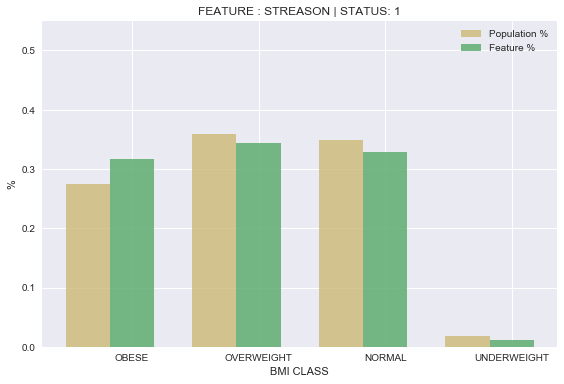

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     1908
STREASON 2 OBESE 	 532 	 27.8825995807 %    OFF :-0.740882200664
STREASON 2 OVER 	 690 	 36.1635220126 %    OFF :0.880121202862
STREASON 2 NORMAL 	 663 	 34.748427673 %    OFF :0.436686782268
STREASON 2 UNDER 	 23 	 1.20545073375 %    OFF :-0.575925784466



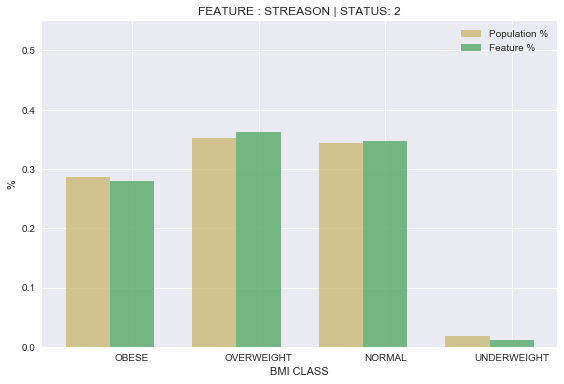

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     668
STREASON 3 OBESE 	 143 	 21.4071856287 %    OFF :-7.76757165281
STREASON 3 OVER 	 231 	 34.5808383234 %    OFF :-1.05022963781
STREASON 3 NORMAL 	 286 	 42.8143712575 %    OFF :9.28686316687
STREASON 3 UNDER 	 8 	 1.19760479042 %    OFF :-0.469061876248



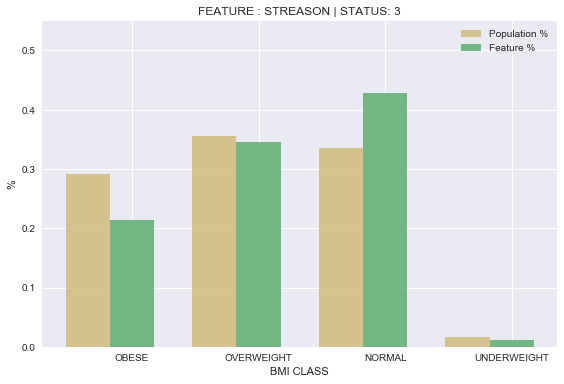

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     429
STREASON 4 OBESE 	 118 	 27.5058275058 %    OFF :-0.972128562096
STREASON 4 OVER 	 150 	 34.965034965 %    OFF :-0.601252618701
STREASON 4 NORMAL 	 150 	 34.965034965 %    OFF :0.567153675114
STREASON 4 UNDER 	 11 	 2.5641025641 %    OFF :1.00622750568



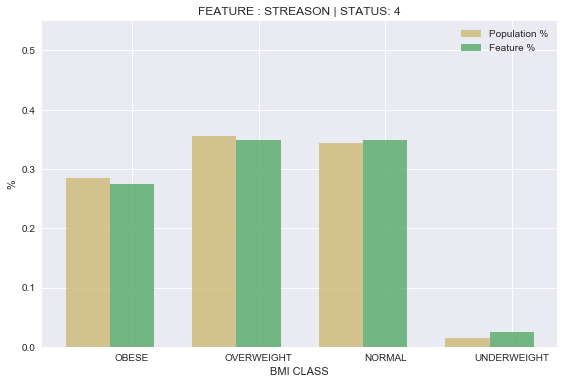

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     112
STREASON 5 OBESE 	 35 	 31.25 %    OFF :2.88004750594
STREASON 5 OVER 	 43 	 38.3928571429 %    OFF :2.91185951815
STREASON 5 NORMAL 	 31 	 27.6785714286 %    OFF :-6.86715303699
STREASON 5 UNDER 	 3 	 2.67857142857 %    OFF :1.07524601289



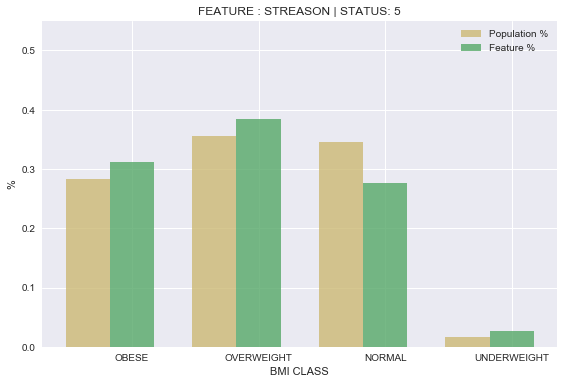

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
TOTAL CASES:     259
STREASON 6 OBESE 	 92 	 35.5212355212 %    OFF :7.38343008794
STREASON 6 OVER 	 84 	 32.4324324324 %    OFF :-3.21789386898
STREASON 6 NORMAL 	 77 	 29.7297297297 %    OFF :-4.88857350293
STREASON 6 UNDER 	 6 	 2.3166023166 %    OFF :0.723037283972



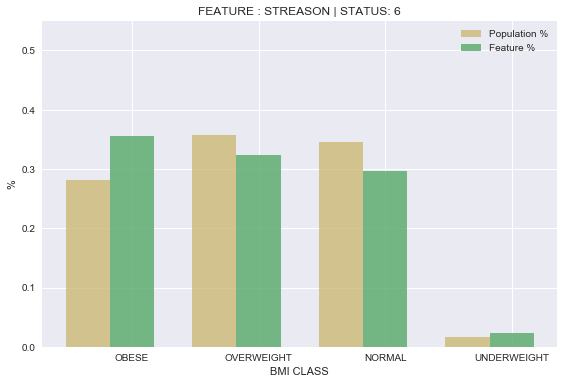

----------------------------------------------------------------------------------


[]

In [7]:
print("Bar charts showing difference of BMI class distribution between feature-specifc and general population")
print()
print("Note: \tGeneral popluation is taken to be the whole population - the features. ")
print("\tThis prevents double counting and accentuates the effect of the feature.")
print()
feat_to_bmi(RESULTS_ON_OFF,2,0)
feat_to_bmi(RESULTS_THREE,3,0)
feat_to_bmi(RESULTS_FIVE,5,0)
feat_to_bmi(RESULTS_SIX,6,0)

Next, we visualize the difference between the shape of distributions!

Legend: Yellow is general population BMI distribution, Blue is feature BMI distribution.




C:\Users\lmbp_win10v2\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


----------------------------------------------------------------------------------


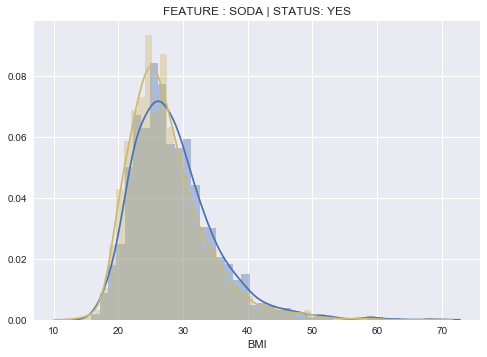

T-statistic: 6.37596551655 p-value: 1.93645003545e-10
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


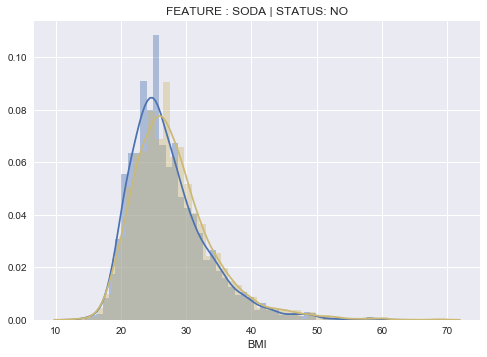

T-statistic: -5.64538849246 p-value: 1.71409502786e-08
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


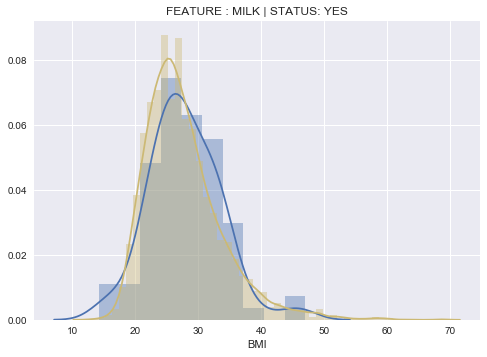

T-statistic: 0.361117451031 p-value: 0.718022791161
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


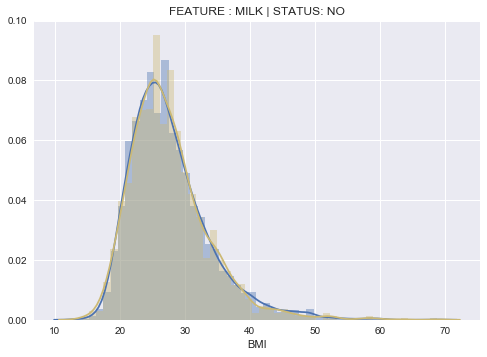

T-statistic: 0.697392812053 p-value: 0.485580680779
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


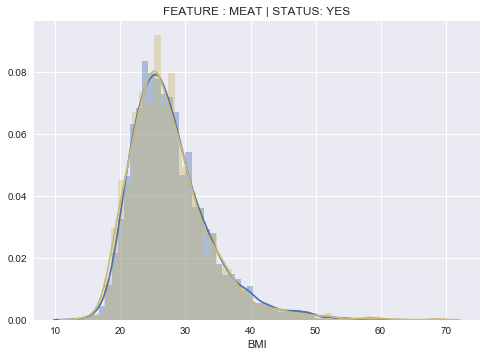

T-statistic: 1.7204782709 p-value: 0.0853907284333
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


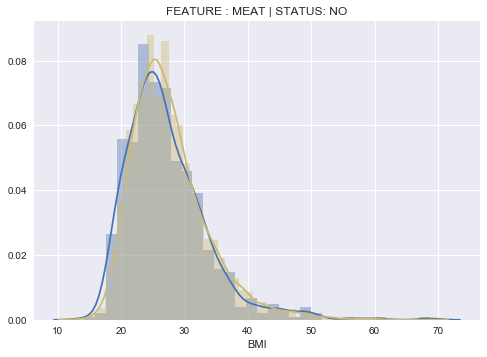

T-statistic: -1.833372439 p-value: 0.0667905971605
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


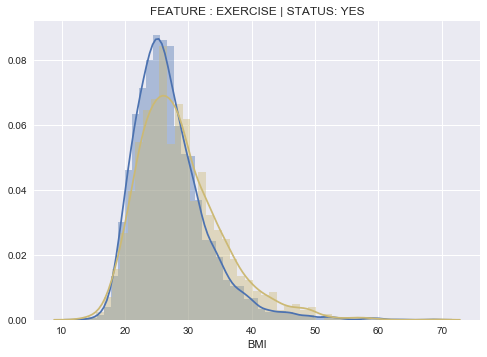

T-statistic: -10.2017974642 p-value: 2.90103491911e-24
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


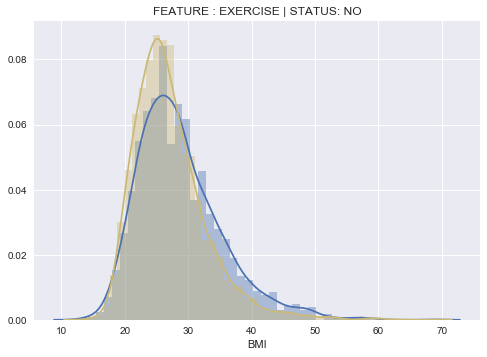

T-statistic: 10.2621019309 p-value: 1.57087339939e-24
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


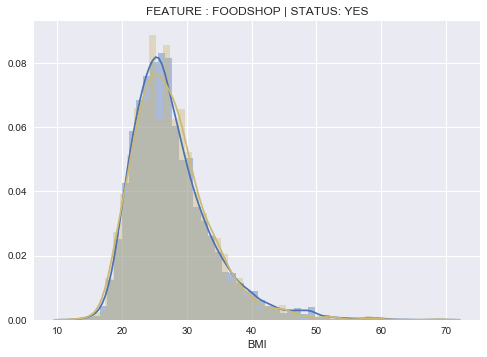

T-statistic: 1.24630838009 p-value: 0.212693846642
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


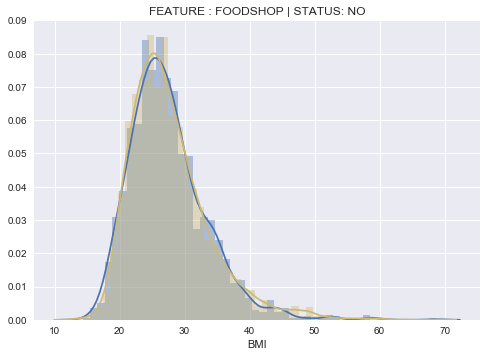

T-statistic: -1.52755946423 p-value: 0.126668150534
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


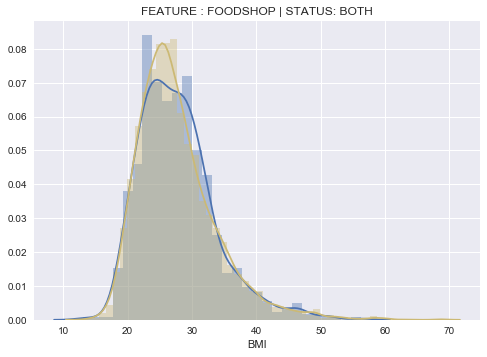

T-statistic: 0.23119813736 p-value: 0.817167786172
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


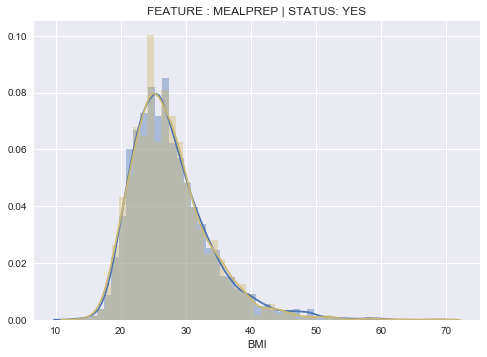

T-statistic: 1.3866018568 p-value: 0.165608351754
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


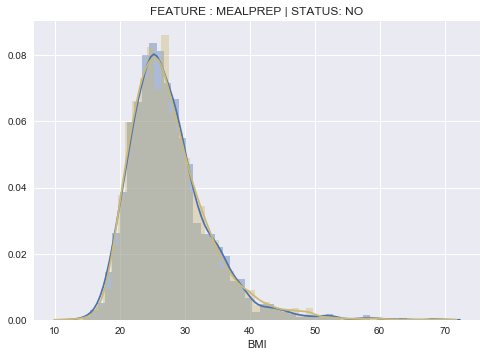

T-statistic: -0.727315229672 p-value: 0.467057741413
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


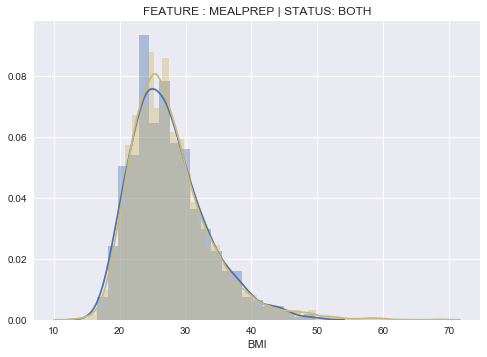

T-statistic: -1.11498648791 p-value: 0.264895350774
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


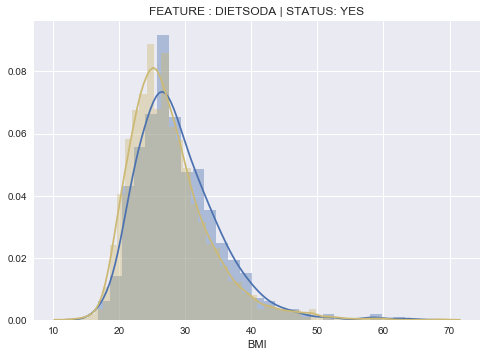

T-statistic: 5.14521626099 p-value: 2.7464357218e-07
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


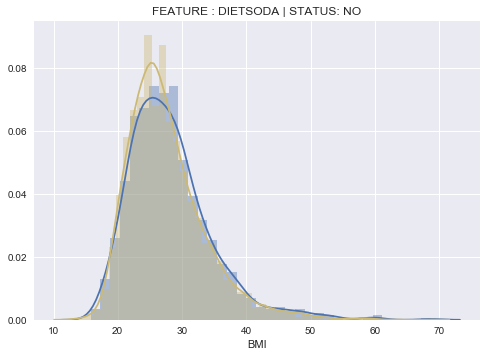

T-statistic: 2.79763597889 p-value: 0.00516218954365
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


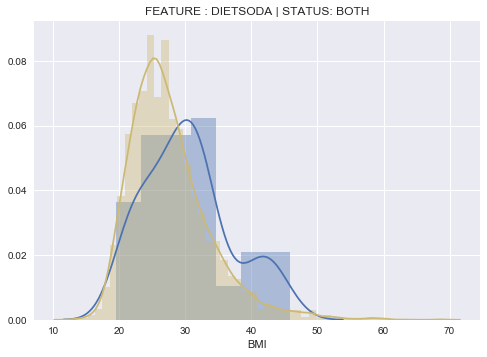

T-statistic: 3.17196677588 p-value: 0.00152079178668
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


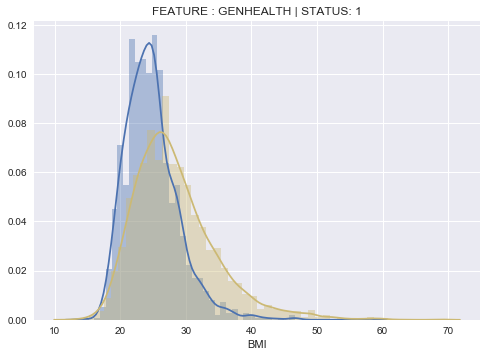

T-statistic: -18.8922632403 p-value: 1.21491012995e-77
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


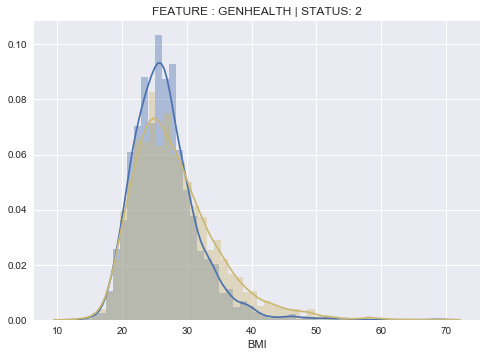

T-statistic: -10.2335618591 p-value: 2.10092786275e-24
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


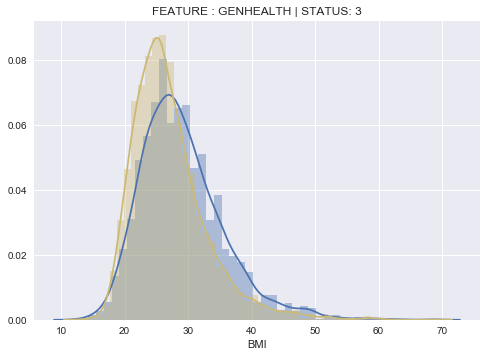

T-statistic: 12.5800317941 p-value: 6.76981560287e-36
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


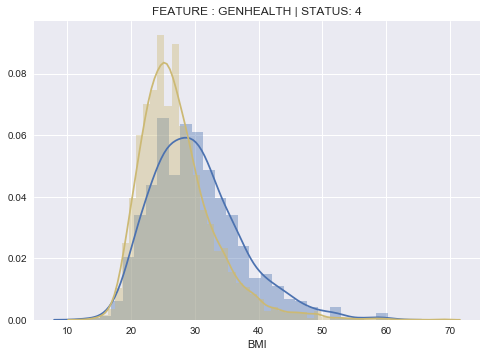

T-statistic: 12.982995985 p-value: 4.2922112142e-38
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


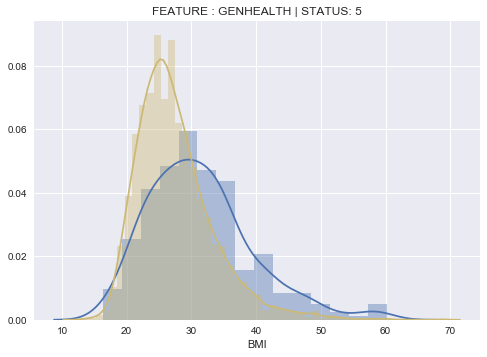

T-statistic: 10.3494456024 p-value: 6.42136833022e-25
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


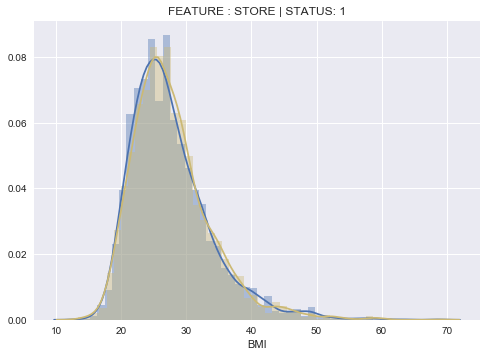

T-statistic: -0.858536118608 p-value: 0.39062655271
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


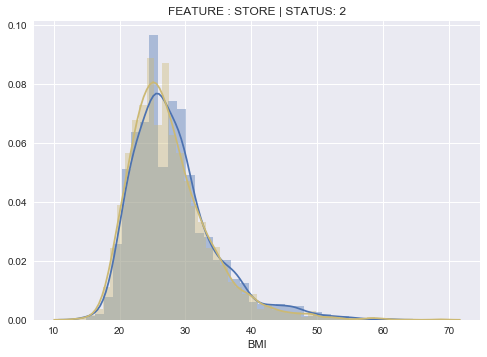

T-statistic: 3.0846142199 p-value: 0.00204628792591
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


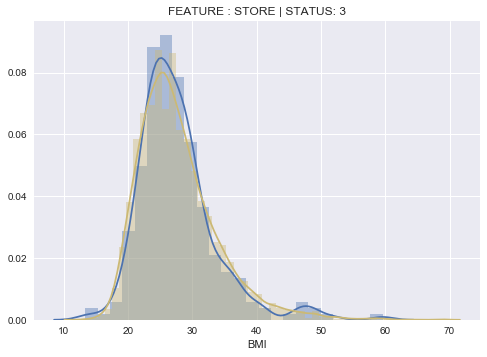

T-statistic: -0.130699976471 p-value: 0.89601649119
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


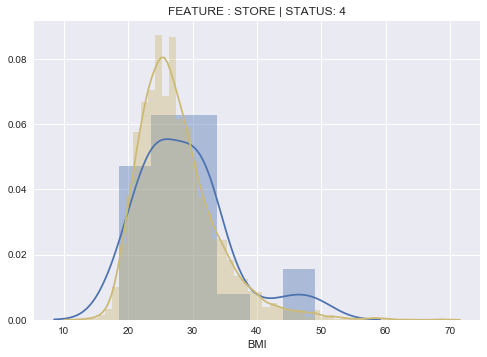

T-statistic: 0.925456032404 p-value: 0.354761364701
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


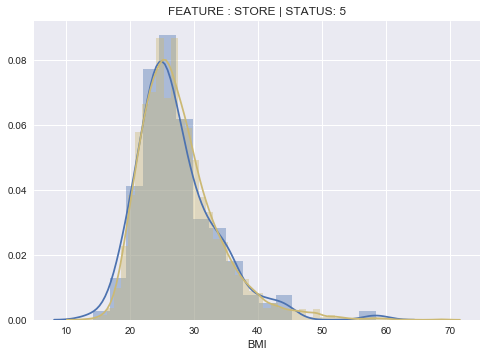

T-statistic: -0.758046941669 p-value: 0.448448974587
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


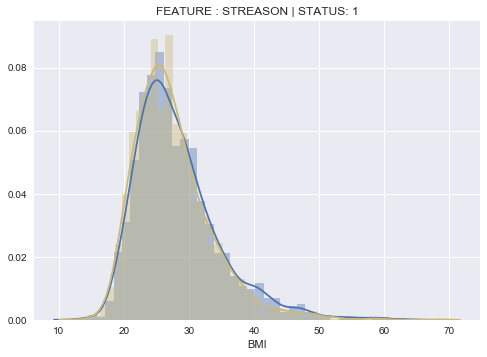

T-statistic: 4.36187414601 p-value: 1.30843891725e-05
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


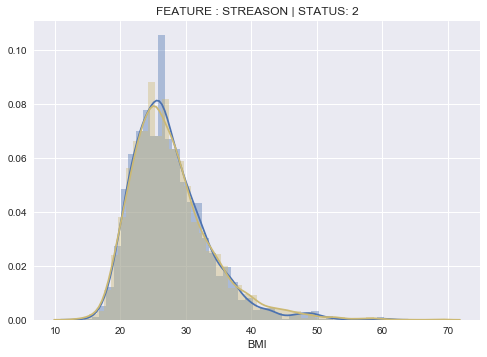

T-statistic: -1.31759554688 p-value: 0.187683168511
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


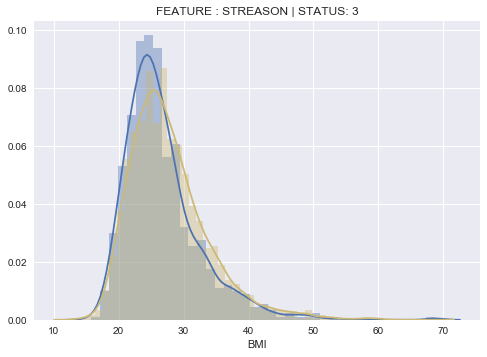

T-statistic: -4.26603699237 p-value: 2.01655132913e-05
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


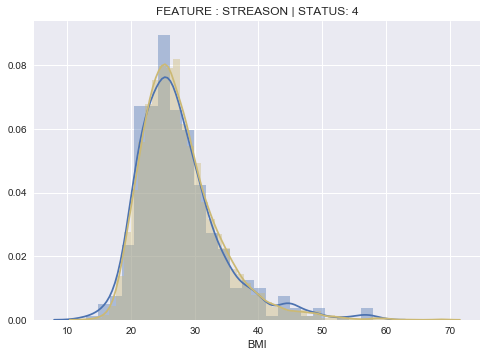

T-statistic: -0.303364070719 p-value: 0.761621641971
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


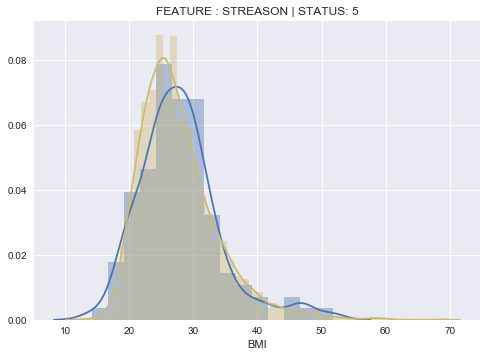

T-statistic: 0.415557889305 p-value: 0.677746570637
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------


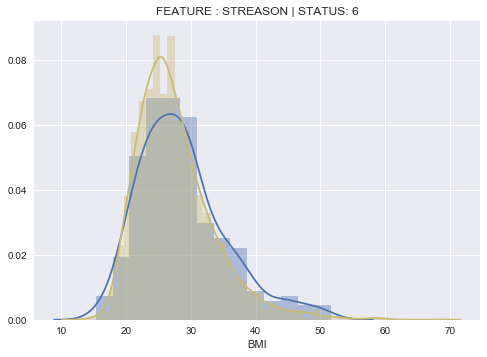

T-statistic: 2.68857761179 p-value: 0.00719308845872
----------------------------------------------------------------------------------



In [8]:
print("Next, we visualize the difference between the shape of distributions!")
print()
print("Legend: Yellow is general population BMI distribution, Blue is feature BMI distribution.")
print()
print()
z1 = feat_to_bmi(RESULTS_ON_OFF,2,1)
z2 = feat_to_bmi(RESULTS_THREE,3,1)
z3 = feat_to_bmi(RESULTS_FIVE,5,1)
z4 = feat_to_bmi(RESULTS_SIX,6,1)



In [9]:
z_list = [z1,z2,z3,z4]
z_master = []

for x in z_list:
    for y in x:
        z_master.append(y)

b = sorted(z_master)

print("Table showing t-test results ranked by p-Values")

print()
print("Format:")
print("[P-value, T-Value, Feature, State]")
print("---------------------------------------")
for a in b:
    print (a)
print()

print ("From this table, we can see how much each feature, affect BMI by how much and how confidently.")

Table showing t-test results ranked by p-Values

Format:
[P-value, T-Value, Feature, State]
---------------------------------------
[1.2149101299476932e-77, -18.892263240290092, 'GENHEALTH', 1]
[4.2922112141956692e-38, 12.982995985048268, 'GENHEALTH', 4]
[6.769815602866726e-36, 12.580031794110448, 'GENHEALTH', 3]
[6.4213683302206721e-25, 10.349445602377697, 'GENHEALTH', 5]
[1.5708733993942332e-24, 10.262101930936156, 'EXERCISE', 2]
[2.1009278627530749e-24, -10.233561859076113, 'GENHEALTH', 2]
[2.9010349191131296e-24, -10.201797464244738, 'EXERCISE', 1]
[1.93645003545196e-10, 6.3759655165470015, 'SODA', 1]
[1.7140950278612236e-08, -5.6453884924626445, 'SODA', 2]
[2.7464357217985126e-07, 5.145216260985368, 'DIETSODA', 1]
[1.3084389172493753e-05, 4.3618741460056523, 'STREASON', 1]
[2.0165513291276241e-05, -4.2660369923743282, 'STREASON', 3]
[0.0015207917866817086, 3.1719667758828902, 'DIETSODA', 3]
[0.0020462879259083564, 3.0846142198971505, 'STORE', 2]
[0.0051621895436491606, 2.797635978

## Summary
We see that general health most highly correlates with BMI.
print("Behaviorally, we see that both EXERCISING, has a greater impact than dieting and shopping habbits
This is supported by the fact that it has both a lower p-value and higher absolute T-value!

## We can reject the null hypothesis. Excerise plays a bigger role than dieting habbits and food shopping features.

---

# Part 2: Analysis of Continuous Variables

In [10]:
CONTINUOUS_FEATURES = [ 'AGE', 'PED', 'SED_EAT', 'EXFREQ', 'FASTFDFREQ']
df_x= df_atus[CONTINUOUS_FEATURES + ['BMI']]

print("Testing for different kinds of correlations for cotinuous feature")
for x in CONTINUOUS_FEATURES:
    print ('['+x+']')
    print ('Pearson')
    print (df_x[[x,'BMI']].corr(method='pearson'))
    print ()
    print ('Spearman')
    print (df_x[[x,'BMI']].corr(method='spearman'))
    print ()
    print ('Kendall-tau')
    print (df_x[[x,'BMI']].corr(method='kendall'))
    print ()
    print ('-------------------------')
    print ()



Testing for different kinds of correlations for cotinuous feature
[AGE]
Pearson
          AGE       BMI
AGE  1.000000  0.073505
BMI  0.073505  1.000000

Spearman
          AGE       BMI
AGE  1.000000  0.108431
BMI  0.108431  1.000000

Kendall-tau
          AGE       BMI
AGE  1.000000  0.072657
BMI  0.072657  1.000000

-------------------------

[PED]
Pearson
          PED       BMI
PED  1.000000 -0.061408
BMI -0.061408  1.000000

Spearman
          PED       BMI
PED  1.000000 -0.060417
BMI -0.060417  1.000000

Kendall-tau
          PED       BMI
PED  1.000000 -0.041452
BMI -0.041452  1.000000

-------------------------

[SED_EAT]
Pearson
          SED_EAT       BMI
SED_EAT  1.000000 -0.019404
BMI     -0.019404  1.000000

Spearman
          SED_EAT       BMI
SED_EAT  1.000000 -0.033693
BMI     -0.033693  1.000000

Kendall-tau
          SED_EAT       BMI
SED_EAT  1.000000 -0.024564
BMI     -0.024564  1.000000

-------------------------

[EXFREQ]
Pearson
          EXFREQ       BMI
EXFREQ 

Age and EXFREQ has the biggest impact on BMI. Spearman for EXEFREQ vs BMI is -0.12.

Since EXEFREQ and FASTFDFREQ are base on the same unit (times per week), they can be compared. 

Lets see visualize a scatterplot.

--------------------------------------------------------
   	 scatter plot of: AGE


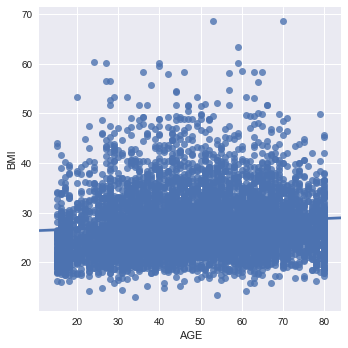

Pearson Corr: 0.0954732430698 P-value: 5.35054961761e-15

--------------------------------------------------------
--------------------------------------------------------
   	 scatter plot of: PED


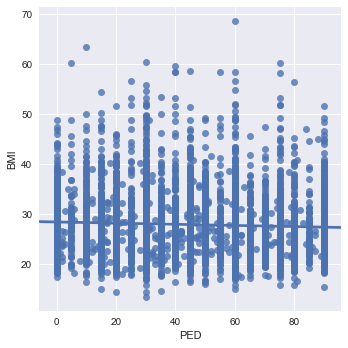

Pearson Corr: -0.0475139069413 P-value: 0.000531969527416

--------------------------------------------------------
--------------------------------------------------------
   	 scatter plot of: SED_EAT


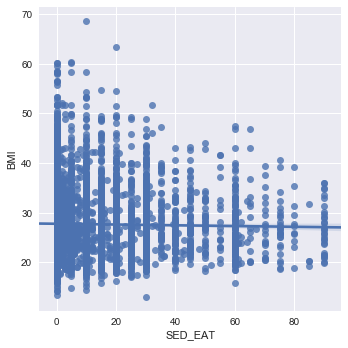

Pearson Corr: -0.019784891684 P-value: 0.108576320952

--------------------------------------------------------
--------------------------------------------------------
   	 scatter plot of: EXFREQ


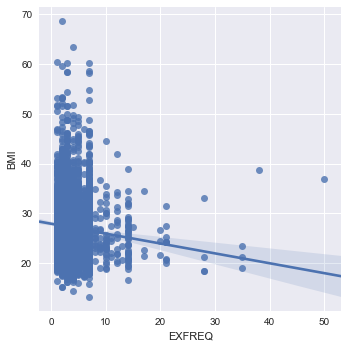

Pearson Corr: -0.0953801143309 P-value: 2.40486833233e-10

--------------------------------------------------------
--------------------------------------------------------
   	 scatter plot of: FASTFDFREQ


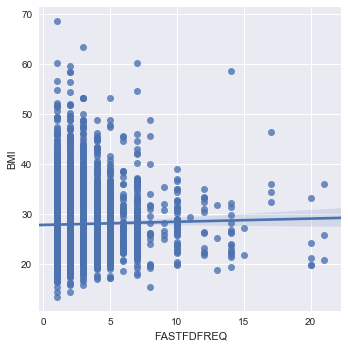

Pearson Corr: 0.0227276492822 P-value: 0.155032248801

--------------------------------------------------------


In [11]:

keep_record = []
for x in CONTINUOUS_FEATURES:
   
    #df_x[[x,'BMI']].plot(kind='scatter', x=x, y='BMI')
    temp_df = df_x
    if (x=='AGE'):
        temp_df = temp_df[temp_df[x] <= 80]
    if (x=='SED_EAT'):
        temp_df = temp_df[temp_df[x] <= 8000]
    if (x=='EXFREQ' or 'FASTFDFREQ'):
        temp_df = temp_df[temp_df[x] <= 90]
        
    print('--------------------------------------------------------')
    print('   \t scatter plot of: '+str(x))
    sns.lmplot(x=x,y='BMI',data=temp_df,fit_reg=True,  palette="Set1")
    plt.show()
    s = scipy.stats.pearsonr(temp_df[x],temp_df['BMI'])
    print( "Pearson Corr: "+str(s[0]),"P-value: "+str(s[1]) )
    keep_record.append([s[1],s[0],x])
    
    
    print()
    print('--------------------------------------------------------')

We can also see people reported in whole numbers who are multiples of 10.

In [12]:
b = sorted(keep_record)

print("Table showing correlation results ranked by p-Values")

print()
print("Format:")
print("[P-value, Pearson Coeff. , Feature]")
print("---------------------------------------")
for a in b:
    print (a)
print()
print()
print ("From this table, we can see how much each feature, affect BMI by how much and how confidently.")

Table showing correlation results ranked by p-Values

Format:
[P-value, Pearson Coeff. , Feature]
---------------------------------------
[5.3505496176085029e-15, 0.095473243069835539, 'AGE']
[2.4048683323342059e-10, -0.095380114330923221, 'EXFREQ']
[0.00053196952741588319, -0.047513906941255984, 'PED']
[0.10857632095151964, -0.019784891684049389, 'SED_EAT']
[0.15503224880096297, 0.022727649282171757, 'FASTFDFREQ']


From this table, we can see how much each feature, affect BMI by how much and how confidently.


# Summary of results

We can observe that more time spent during eating correlate with slightly BMI.   
Frequency of excercise correlate with lower BMI. Away from Obesity to normal.   

## Excerise frequency of excerise has the strongest corrleation with the lowest P-values Besides AGE.
## Again we can reject the null hypothesis. Excerise plays a bigger role than dieting habbits.